# Comparative Analysis of Fraud Detection Models 

# Import Libraries! 


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the dataset

In [ ]:
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

# Initial Data Exploration

In [ ]:

# Print the top 5 rows
print("\n--- First 5 rows of data ---")
print(data.head())

# Print the last 5 rows
print("\n--- Last 5 rows of data ---")
print(data.tail())

# Print the top 25 rows to understand what is driving a decision of fraud
print("\n--- First 25 rows of data ---")
print(data.head())

# Event rate
print("\n--- Event Rate ---")
event_rate = data['fraud'].mean() * 100
print(f'Event Rate: {event_rate:.2f}%')

# of all important metrics to explore, this one is most particularly interesting to me. 
# by understanding that 8.74% of the time, there is a fraud, 


# Data Preperation 

In [ ]:
# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#important to note here that the random state is a great place to test different splits of the data. 

# model initialization 


In [ ]:

Forest = RandomForestClassifier(n_estimators=100, random_state = 42, max_depth=3)

# here we have two different hyperparameters that could be further refined and tuned. 

# Train the model on the training data
Forest.fit(X_train, y_train)

# Make predictions on the test data

y_pred = Forest.predict(X_test)




# Evaluate the model


In [ ]:
accuracy = accuracy_score(y_test, y_pred)

confusion = confusion_matrix(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)




# Print the results

In [ ]:
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# Preperation of materials for bar graph 


In [ ]:

f_1score = [0.88, 0.82]
models = ['Decision Tree', 'Random Forest']

# Create a bar graph to compare the two models
plt.bar(models, f_1score, color=['blue', 'green'])

#add labels and title 

plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Model Comparison via F1 Scores')

# Display the chart 
plt.show()

# Interpretation of the Confusion Matrix

Confusion Matrix : 

[182557     0] 
[5294   12149]

On the the first number, 182557, is the true negative value. This would mean correctly predicting the 
fraud to not have occured. 

The second number, 0, is the false positive rate, which is to say that the model predicted a positive and 
received a negative. This would be flagging a non-true fraud account and would be particularly 
bad user-experience wise. 

The third number, 5294, false negative, would predictive a no fraud and was actually Fraudaulent. In this case this is 
particularly harmful as each fraud could cost the bank quite a bit of money. This is a red flag.

The last number, 12149,  is the true prediction rate, or where the model predicted fraud and caught fraud. 

# Conclusion 

Overall, this model is not production quality. While precision was 1.0, suggesting it minimized all false positives. An impressive feat, especially for customer experience this is strongly offset by the recall score of fraud which was fairly low (70%). In this case, a false negative would potential cost the bank hundreds of thousands of dollars, if not millions, and as such could NOT be used in a production environment. 

# Model Comparison 

Given the importance of maximizing recall, while keeping precision as high as possible still, the most mportant metric will be the f-1 score. As such, let's compare the two. 

The random forest classifier I designed has an f-1 score of 0.82 for fraud detection. Whereas Paul's f-1 score was 0.88. As such, I would 100% move forward with model 1 given the ultimatum to choose. This comparison is visualized below

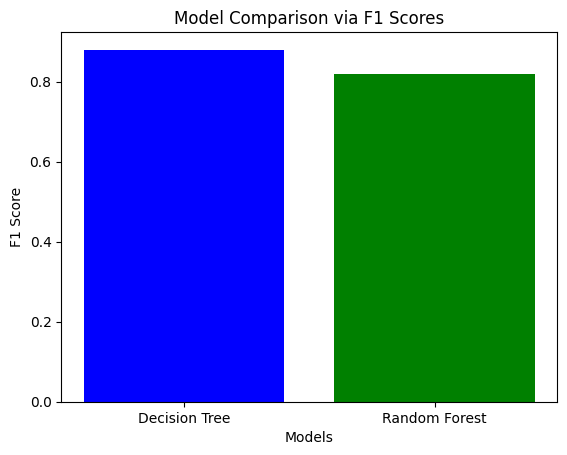

# Next steps

The RandomForest model designed here does not seem the best fit for production. As such, the decision tree model could be further improved by exploring feature engineering, trying other algorithms, or tuning hyperparameters.

# Advanced Model Enhancement and Evaluation

In [ ]:
%pip install imblearn

# Balancing the data + rebuilding random forest model

In [ ]:
# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

# Data Preperation 

In [ ]:
# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# SMOTE (Synthetic Minority Over-sampling Technique) METHOD

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assume X is your feature matrix and y are your labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42, k_neighbors = 5)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Why would SMOTE be used? 

When one class, for example non-fraudulent or fraudulent activity, significantly outnumbers the other class (or classes) this is called a class-imbalanced dataset. To handle this, SMOTE is utilized in order to allow better performance for many different machine learning algorithms, including RandomForests. 

# How does SMOTE work? 

It works by creating synthetic samples of the minority class data. It does this by calculating the k-nearest neighbors. The amount of which can be specified. 

Then, depending on the amount of oversampling required, the k-nearest neighbor (one or more) are selects in order to create sythetic examples. 

A sythetic example is then created at a random point between the feature and its k-nearest neighbor. 

# What is the result? 

An increased number of minority class instances. This can help to understand more about the minority classes characteristics. 

# What issues may SMOTE cause? 

The most common problem SMOTE creates is overfitting.

# Rebuild the random forest model

In [ ]:
# model initialization 

Forest = RandomForestClassifier(n_estimators=100, random_state = 42, max_depth=3)

# here we have two different hyperparameters that could be further refined and tuned. 

# Train the model on the training data
Forest.fit(X_train_smote, y_train_smote)

# Make predictions on the test data

y_pred = Forest.predict(X_test)

# Evaluate the model

In [ ]:

accuracy = accuracy_score(y_test, y_pred)

confusion = confusion_matrix(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)

# Print the results

In [ ]:
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# Preperation of materials for bar graph 

In [ ]:
f_1score = [0.99, 0.88, 0.82]
models = ['SMOTE + Random Forest', 'Decision Tree', 'Random Forest']

# Create a bar graph to compare the two models
plt.bar(models, f_1score, color=['red', 'blue', 'green'])

#add labels and title 

plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Model Comparison via F1 Scores')

# Display the chart 
plt.show()

# Analysis of the results 

As can be seen above, the tion of SMOTE has drastically improved the results of the random forest model. 

As can be seen, the new f-1 score, the relevant metric in this case, is now 0.99. 

Comparing the three models, utilizing the blow bar graph, it is clear this model outperforms all other models.

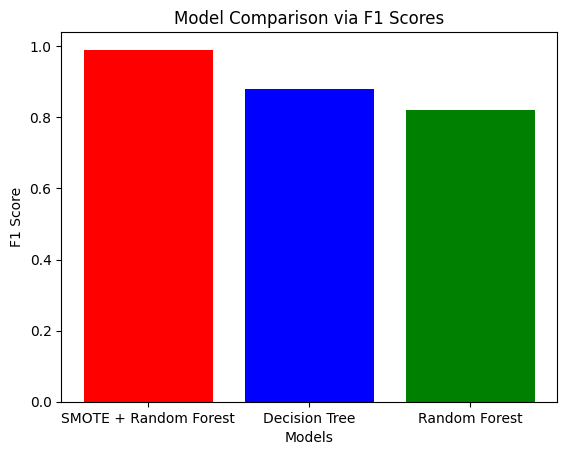

That said, further testing would be necessary!!! An f-1 score of 0.99 seems indicative of a common problem among the SMOTE method. Overfitting. 

Thus, the actionable next step would be to test this model on a similar dataset to see if the results would be the same 


# UNDERSAMPLING METHOD

In [ ]:

from imblearn.under_sampling import RandomUnderSampler

# Assume X is your feature matrix and y are your labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

undersampler = RandomUnderSampler(random_state=42, sampling_strategy=0.5)

X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)


# Why use undersampling? 

It is another method for balancing a dataset where one class significantly outnumbers the others. This is helpful because bias towards the majority class is common within machine learning algorithms. 
In this context especially, Fraud is less likely to occur then regular transactions by a strong magnitude. Thus, undersampling of the non-fraudulent activities likely would help to understand the nuances of the fraudulent behavior.

# How does undersampling work? 

It works by removing instances from the majority class until the desired balance between the majority and minority class is achieved. There are a few techniques, but the most common strategy is utilizing random undersampling, as seen above. It is tuned by utilizing the sampling_strategy hyper parameter. 

# What is the result when applied? 

A more balanced dataset with less bias towards the majority class. This helps improve performance of the model. 

# What issues can be caused as a reslt of Undersampling? 

Obviously there is a loss of information. If this result is significant relative to the whole dataset size, this can also cause overfitting. Additionally, depending on the methodology chosen to remove the data, this could result in bias. 


# Model Initialization 

In [ ]:
Forest = RandomForestClassifier(n_estimators=100, random_state = 42, max_depth=3)

# here we have two different hyperparameters that could be further refined and tuned. 

# Train the model on the training data
Forest.fit(X_train_undersampled, y_train_undersampled)

# Make predictions on the test data

y_pred = Forest.predict(X_test)

# Rebuild the random forest model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

confusion = confusion_matrix(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)

# Print the results

In [ ]:
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# Prepare the bar graph for comparative analysis

In [ ]:
f_1score = [0.99, 0.88, 0.82]
models = ['Undersampling + Random Forest', 'Decision Tree', 'Random Forest']

# Create a bar graph to compare the two models
plt.bar(models, f_1score, color=['red', 'blue', 'green'])

#add labels and title 

plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Model Comparison via F1 Scores')

# Display the chart 
plt.show()

# Analysis of the results 

The analysis here is drastic!

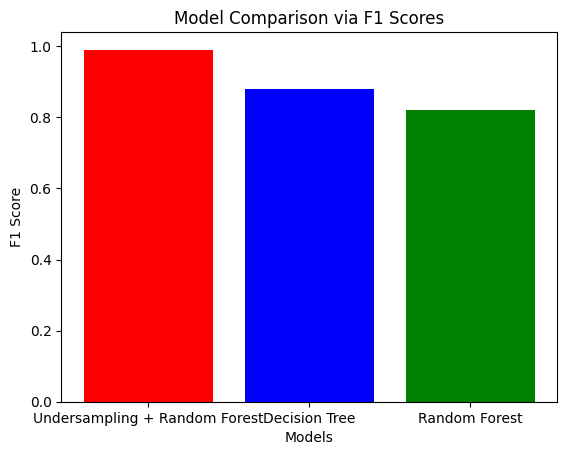

Like utilizing SMOTE, this method drastically improves results! We get all the way up to a 0.99 F-1 score for fraud detection. An incredible result. Obviously, this sort of result invites suspicion, as it would indicate overfitting. 

As such, the next steps would be to apply this trained model to a new data environment and look to be fine tuning the hyperparameter. 

# Cross validation method

In [ ]:
#import libraries 

#dataset loaded and prepared above with the same two modules

from sklearn.model_selection import cross_val_score

# Data preperation

In [ ]:
# Assume X is your feature matrix and y are your labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize the model

In [ ]:
Forest = RandomForestClassifier(n_estimators=100, random_state = 42, max_depth=3)

# Perform 5-fold cross-validation


In [ ]:
scores = cross_val_score(Forest, X, y, cv=5)

# Print the results

In [ ]:
# Print the accuracy for each fold
print("Scores:", scores)

# Print the mean accuracy
print("Mean:", scores.mean())

# Print the standard deviation of the accuracy
print("Standard Deviation:", scores.std())

In [ ]:
accuracy_score = [(0.97305),  (0.973405), (0.97351),  (0.97323), (0.97318)]

folds = ['1', '2', '3', '4', '5']

# Create a bar graph to compare the two models
plt.boxplot(accuracy_score)

#add labels and title 

plt.xlabel('Folds')
plt.ylabel('Accuracy Score')
plt.title('Fold Comparison via Accuracy Scores')

# Display the chart 
plt.show()

# Analysis of 5-fold Cross validation results

Scores: [0.97305  0.973405 0.97351  0.97323  0.97318 ]
Mean: 0.9732749999999999
Standard Deviation: 0.00016358484037341946

The power of this sort of test it that it provides a range of results for the dataset being applied to. This simulated being applied to many datasets, which is especially important when data is lacking. It also provides the standard deviation of the scores for this analysis. This is powerful in order to understand how well the model fits across multiple datasets. 

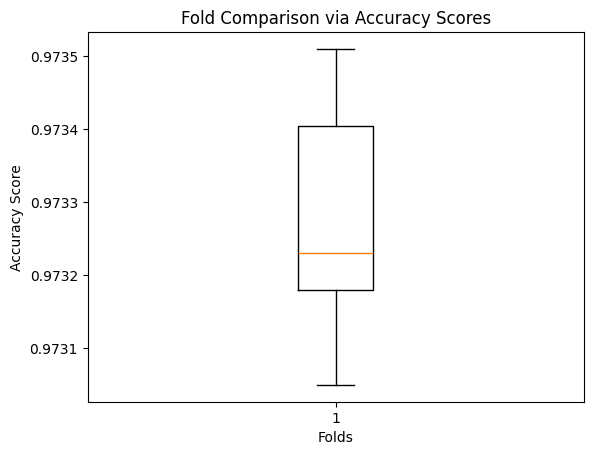

The data is well visualized using the box and whisker plot above. As can be seen the mean is included, as seen in the statistics above, and as are the standard Q1 and Q3 deviations. 

As such, there is not wide variance in the means across these datasets and likely this model similarly well across multiple sets of data in terms of accuracy 

# Feature importance analysis

# Data preperation 

In [ ]:
# Assume X is your feature matrix and y are your labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the random forest model 

In [ ]:

Forest = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model 
Forest.fit(X, y)

# Extract feature importances

In [ ]:
importances = Forest.feature_importances_

# Prepare features for analysis 

In [ ]:

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()

# print the top 5 features 

print(f_importances.to_frame('Importance').head(5))

# Analysis of results 

As can be seen by the bar graph above, there is one factor which has a significant impact on the predicitons of the model. Tis is ratio_to_median_purchase_price. 

Online_order, distance_from_home, & used_pin_number came much further behind. The scores of all of these can be seen above in the table. 

Ultimately, all that can be interpreted here is that these 3 leading variables seem to have a significant impact on the model.

Some next steps I would take are to then run a heat map on the data to see how these features correlate with eachother and see if there can be a feature aggregation. 

# Heatmap creation

In [ ]:
import seaborn as sns

In [ ]:
# Create a heatmap to visualize correlation between numeric variables
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Heatmap analysis

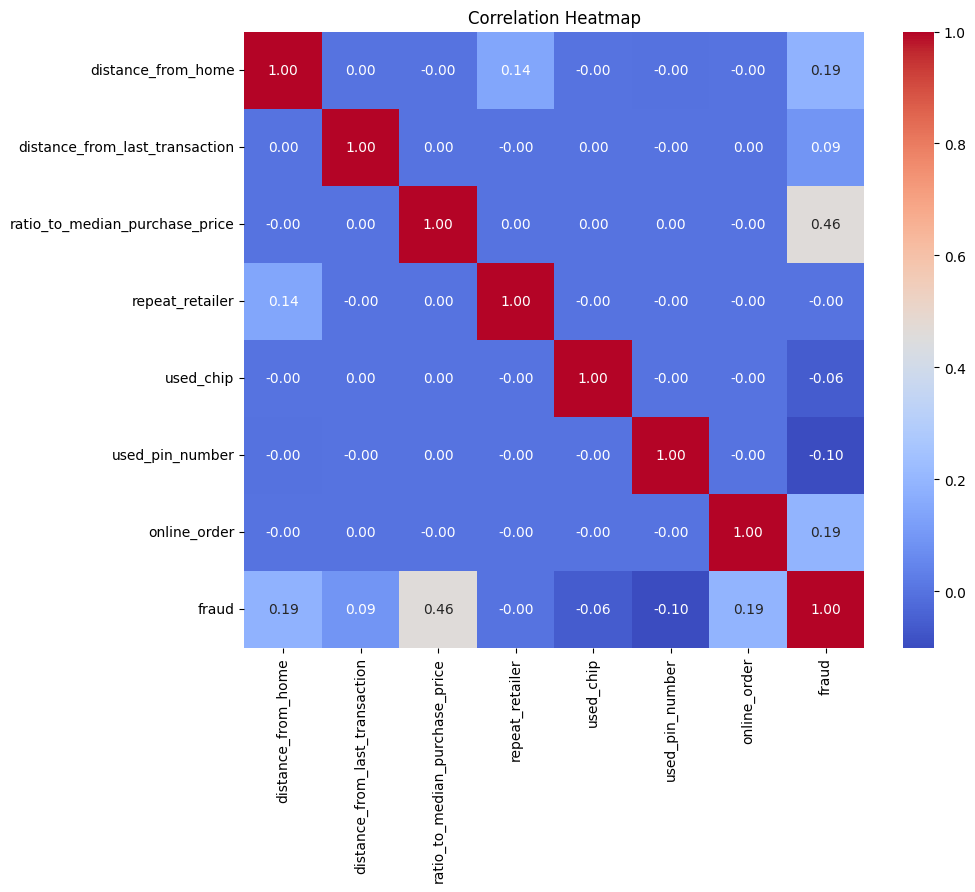

As can be seen above, there are no highly correlated features inside of this model. 

As such, I would not vote to reconsutrct the model wih aggregated features. 